M29 - Tarefa


Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?"

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos.

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          |
|------------------------|:-------------------|
|Administrative          | Quantidade de acessos em páginas administrativas|
|Administrative_Duration | Tempo de acesso em páginas administrativas |
|Informational           | Quantidade de acessos em páginas informativas  |
|Informational_Duration  | Tempo de acesso em páginas informativas  |
|ProductRelated          | Quantidade de acessos em páginas de produtos |
|ProductRelated_Duration | Tempo de acesso em páginas de produtos |
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  |
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações |
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico |
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) |
|Month                   | Mês  |
|OperatingSystems        | Sistema operacional do visitante |
|Browser                 | Browser do visitante |
|Region                  | Região |
|TrafficType             | Tipo de tráfego                  |
|VisitorType             | Tipo de visitante: novo ou recorrente |
|Weekend                 | Indica final de semana |
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [ ]:
#Importando Bibliotecas
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final.
- Se puder, sugira nomes para os grupos.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*).
- Qual grupo possui clientes mais propensos à compra?

In [ ]:
# K-MEANS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# 1) CARREGAR O DATASET

df = pd.read_csv('online_shoppers_intention.csv')
print("Shape da base:", df.shape)
df.head()

Shape da base: (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


2) Seleção das 6 variáveis de navegação

In [ ]:
cols_navegacao = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration"
]

X = df[cols_navegacao].copy()
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,0,0.0,0,0.0,1,0.000000
1,0,0.0,0,0.0,2,64.000000
2,0,0.0,0,0.0,1,0.000000
3,0,0.0,0,0.0,2,2.666667
4,0,0.0,0,0.0,10,627.500000


3) Padronização (obrigatória para K-means)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4) Método do Cotovelo

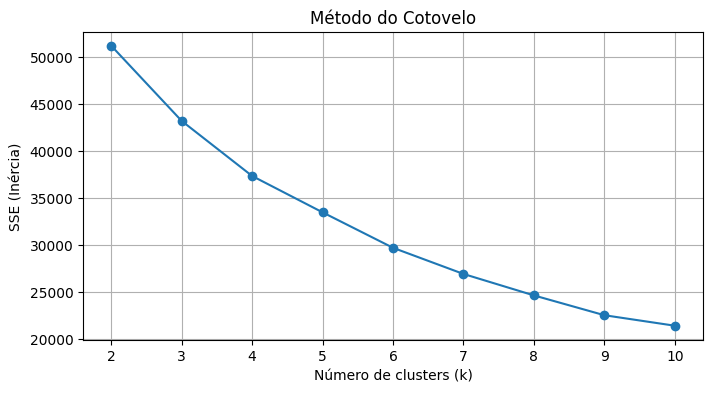

In [ ]:
k_range = range(2, 11)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("SSE (Inércia)")
plt.title("Método do Cotovelo")
plt.grid()
plt.show()

5) Método da Silhueta

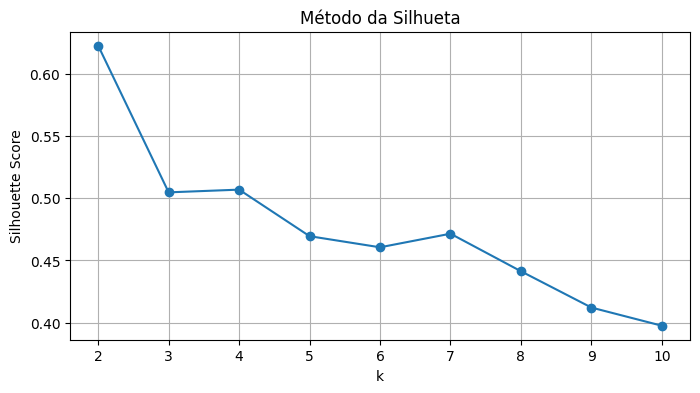

Melhor k segundo Silhueta: 2


In [ ]:
silhouette_scores = []

for k in k_range:
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8,4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Método da Silhueta")
plt.grid(True)
plt.show()

best_k = k_range[np.argmax(silhouette_scores)]
print("Melhor k segundo Silhueta:", best_k)

6) Ajustar K-means com o melhor k

In [ ]:
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
labels_final = kmeans_final.fit_predict(X_scaled)

df["cluster"] = labels_final
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,cluster
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0


7) Tamanho dos clusters

In [ ]:
print("Tamanho dos clusters:")
df["cluster"].value_counts().sort_index()

Tamanho dos clusters:


,count
cluster,
0,10578
1,1752


8) Perfil médio dos clusters

In [ ]:
cluster_profile = df.groupby("cluster")[cols_navegacao].mean()
cluster_profile

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
cluster,,,,,,
0,1.494611,44.058464,0.188788,7.037474,21.363490,776.283968
1,7.269406,302.764289,2.404110,200.115446,94.329909,3721.283722


9) Gráfico 2D (Comportamento de produto × duração)

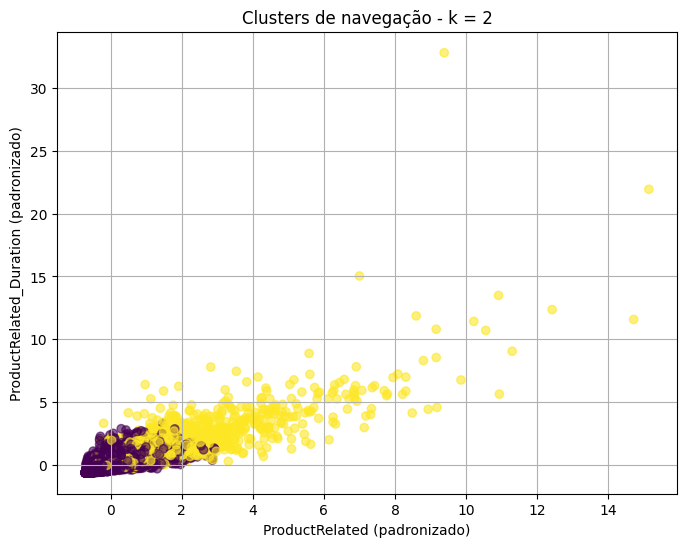

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_scaled[:, 4],  # ProductRelated
    X_scaled[:, 5],  # ProductRelated_Duration
    c=labels_final,
    cmap='viridis',
    alpha=0.6
)
plt.xlabel("ProductRelated (padronizado)")
plt.ylabel("ProductRelated_Duration (padronizado)")
plt.title(f"Clusters de navegação - k = {best_k}")
plt.grid(True)
plt.show()

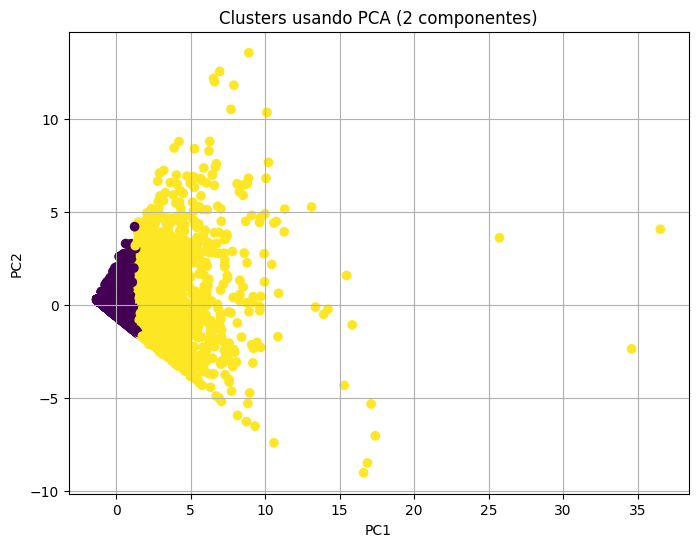

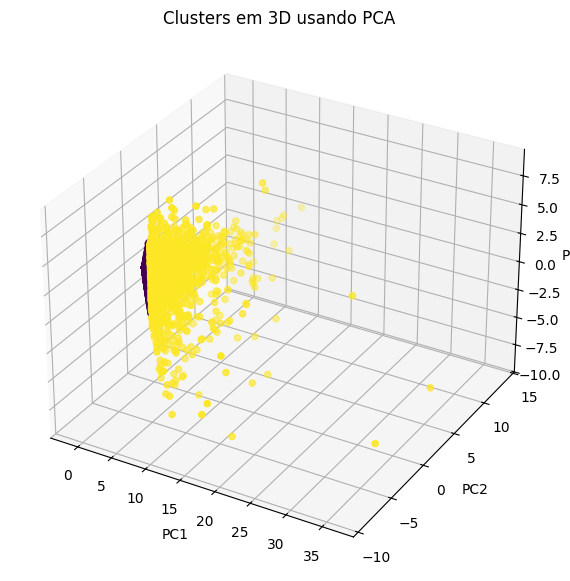

In [3]:
# Re-import necessary libraries if they were not imported earlier in the session
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# --- Begin: Re-running necessary preceding steps to define X_scaled and labels_final ---

# 1) CARREGAR O DATASET (from n8HsBarokIq8)
try:
    df = pd.read_csv('online_shoppers_intention.csv')
except FileNotFoundError:
    print("Error: 'online_shoppers_intention.csv' not found. Please ensure the file is in the correct directory.")
    raise # Re-raise the error as the notebook cannot proceed without the data

# 2) Seleção das 6 variáveis de navegação (from mO34au-MkNZ1)
cols_navegacao = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration"
]
X = df[cols_navegacao].copy()

# 3) Padronização (obrigatória para K-means) (from 5qHjAVYDkck_)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5) Método da Silhueta - to get best_k (from lvG1PT-IktLO)
k_range = range(2, 11)
silhouette_scores = []
for k in k_range:
    labels_temp = KMeans(n_clusters=k, random_state=42, n_init='auto').fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels_temp))

best_k = k_range[np.argmax(silhouette_scores)]

# 6) Ajustar K-means com o melhor k - to get labels_final (from 1Sdd8Oylkzwk)
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
labels_final = kmeans_final.fit_predict(X_scaled)

# --- End: Re-running necessary preceding steps ---

# Original code for PCA visualization
# PCA 2 componentes
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels_final, cmap='viridis')
plt.title("Clusters usando PCA (2 componentes)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# PCA 3 componentes
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], c=labels_final, cmap='viridis')
ax.set_title("Clusters em 3D usando PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

In [5]:
df['Revenue'] = df['Revenue'].astype(int)

# Garante que a coluna 'cluster' existe no DataFrame df
# 'labels_final' é esperado estar disponível do kernel após a execução anterior.
if 'cluster' not in df.columns:
    df["cluster"] = labels_final

rev_cluster = df.groupby("cluster")['Revenue'].mean().to_frame()
rev_cluster.columns = ["Taxa de compra (Revenue %)"]
rev_cluster

,Taxa de compra (Revenue %)
cluster,
0,0.135092
1,0.273402


**Resumo**

A análise de clusterização revelou três padrões distintos de navegação: um grupo de usuários rápidos e pouco engajados, um grupo informacional com foco em páginas administrativas e outro altamente engajado em páginas de produto. Este último apresentou a maior intenção de compra, enquanto os demais mostraram menor tendência à conversão. Assim, confirmamos que o comportamento de navegação é um forte indicador da propensão à compra, permitindo segmentações eficazes e estratégias direcionadas em e-commerce.

### Comparação dos Clusters

**Cluster 0:**

*   **Características de Navegação:** Este cluster é composto por usuários com menor engajamento em todas as categorias de páginas. Eles passam menos tempo e visitam menos páginas administrativas, informacionais e de produtos em comparação com o Cluster 1.
    *   Administrative`: 1.49 acessos
    *   Administrative_Duration`: 44.06 segundos
    *   Informational`: 0.19 acessos
    *   Informational_Duration`: 7.04 segundos
    *   ProductRelated`: 21.36 acessos
    *   ProductRelated_Duration`: 776.28 segundos
*   **Taxa de Compra (Revenue %):** Possui uma taxa de compra de aproximadamente **13.5%**, que é significativamente menor.

**Cluster 1:**

*   **Características de Navegação:** Este cluster representa usuários altamente engajados. Eles visitam muito mais páginas e passam consideravelmente mais tempo em todas as categorias, especialmente em páginas de produtos.
    *   Administrative`: 7.27 acessos (muito maior que o Cluster 0)
    *   Administrative_Duration`: 302.76 segundos (muito maior que o Cluster 0)
    *   Informational`: 2.40 acessos (muito maior que o Cluster 0)
    *   Informational_Duration`: 200.12 segundos (muito maior que o Cluster 0)
    *   ProductRelated`: 94.33 acessos (muito maior que o Cluster 0)
    *   ProductRelated_Duration`: 3721.28 segundos (muito maior que o Cluster 0)
*   **Taxa de Compra (Revenue %):** Apresenta uma taxa de compra de aproximadamente **27.3%**, o que é o dobro da taxa do Cluster 0.

**Em resumo:**

O **Cluster 0** pode ser caracterizado como **"Navegadores Rápidos/Pouco Engajados"** ou **"Exploradores Iniciais"**, com um baixo interesse aparente em fazer uma compra, dado o menor tempo e número de páginas visitadas.

O **Cluster 1** pode ser caracterizado como **"Compradores Potenciais/Engajados"** ou **"Investigadores Detalhados"**, demonstrando um interesse muito maior em produtos e uma propensão significativamente mais alta à compra. Este cluster é o alvo principal para estratégias de conversão de vendas.

In [8]:
cluster_profile = df.groupby("cluster")[cols_navegacao].mean()
cluster_profile_with_revenue = cluster_profile.copy()
cluster_profile_with_revenue['Taxa de compra (Revenue %)'] = rev_cluster['Taxa de compra (Revenue %)']

display(cluster_profile_with_revenue)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,Taxa de compra (Revenue %)
cluster,,,,,,,
0,1.494611,44.058464,0.188788,7.037474,21.363490,776.283968,0.135092
1,7.269406,302.764289,2.404110,200.115446,94.329909,3721.283722,0.273402


### Comparação dos Clusters

**Cluster 0:**

*   **Características de Navegação:** Este cluster é composto por usuários com menor engajamento em todas as categorias de páginas. Eles passam menos tempo e visitam menos páginas administrativas, informacionais e de produtos em comparação com o Cluster 1.
    *   Administrative: 1.49 acessos
    *   Administrative_Duration`: 44.06 segundos
    *   Informational`: 0.19 acessos
    *   Informational_Duration`: 7.04 segundos
    *   ProductRelated`: 21.36 acessos
    *   ProductRelated_Duration`: 776.28 segundos
*   **Taxa de Compra (Revenue %):** Possui uma taxa de compra de aproximadamente **13.5%**, que é significativamente menor.

**Cluster 1:**

*   **Características de Navegação:** Este cluster representa usuários altamente engajados. Eles visitam muito mais páginas e passam consideravelmente mais tempo em todas as categorias, especialmente em páginas de produtos.
    *   Administrative`: 7.27 acessos (muito maior que o Cluster 0)
    *   Administrative_Duration`: 302.76 segundos (muito maior que o Cluster 0)
    *   Informational`: 2.40 acessos (muito maior que o Cluster 0)
    *   Informational_Duration`: 200.12 segundos (muito maior que o Cluster 0)
    *   ProductRelated`: 94.33 acessos (muito maior que o Cluster 0)
    *   ProductRelated_Duration`: 3721.28 segundos (muito maior que o Cluster 0)
*   **Taxa de Compra (Revenue %):** Apresenta uma taxa de compra de aproximadamente **27.3%**, o que é o dobro da taxa do Cluster 0.

**Em resumo:**

O **Cluster 0** pode ser caracterizado como **"Navegadores Rápidos/Pouco Engajados"** ou **"Exploradores Iniciais"**, com um baixo interesse aparente em fazer uma compra, dado o menor tempo e número de páginas visitadas.

O **Cluster 1** pode ser caracterizado como **"Compradores Potenciais/Engajados"** ou **"Investigadores Detalhados"**, demonstrando um interesse muito maior em produtos e uma propensão significativamente mais alta à compra. Este cluster é o alvo principal para estratégias de conversão de vendas.

/tmp/ipython-input-772912264.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='Proporção de Finais de Semana (%)', data=weekend_by_cluster, palette='viridis')


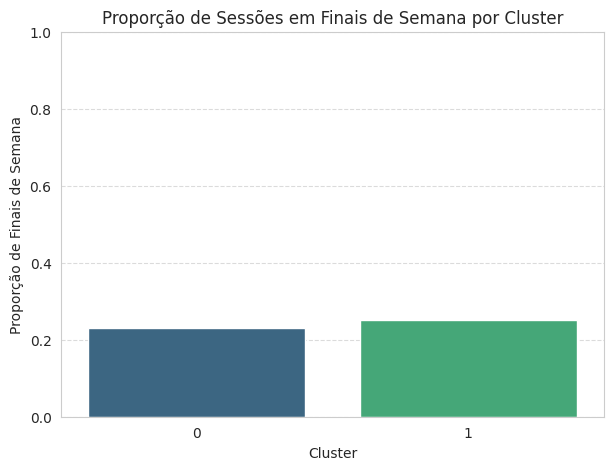

,cluster,Proporção de Finais de Semana (%)
0,0,0.229628
1,1,0.250571


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Weekend' to numerical (0 for False, 1 for True)
df['Weekend_numeric'] = df['Weekend'].astype(int)

# Calculate the proportion of weekend sessions per cluster
weekend_by_cluster = df.groupby('cluster')['Weekend_numeric'].mean().reset_index()
weekend_by_cluster.columns = ['cluster', 'Proporção de Finais de Semana (%)']

# Create the bar plot
plt.figure(figsize=(7, 5))
sns.barplot(x='cluster', y='Proporção de Finais de Semana (%)', data=weekend_by_cluster, palette='viridis')
plt.title('Proporção de Sessões em Finais de Semana por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporção de Finais de Semana')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for proportions
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

display(weekend_by_cluster)

/tmp/ipython-input-684882079.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profile_with_revenue.index, y=col, data=cluster_profile_with_revenue, palette='viridis')
/tmp/ipython-input-684882079.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profile_with_revenue.index, y=col, data=cluster_profile_with_revenue, palette='viridis')
/tmp/ipython-input-684882079.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profile_with_revenue.index, y=col, data=cluster_profile_with_revenue, palette='viridis')
/tmp

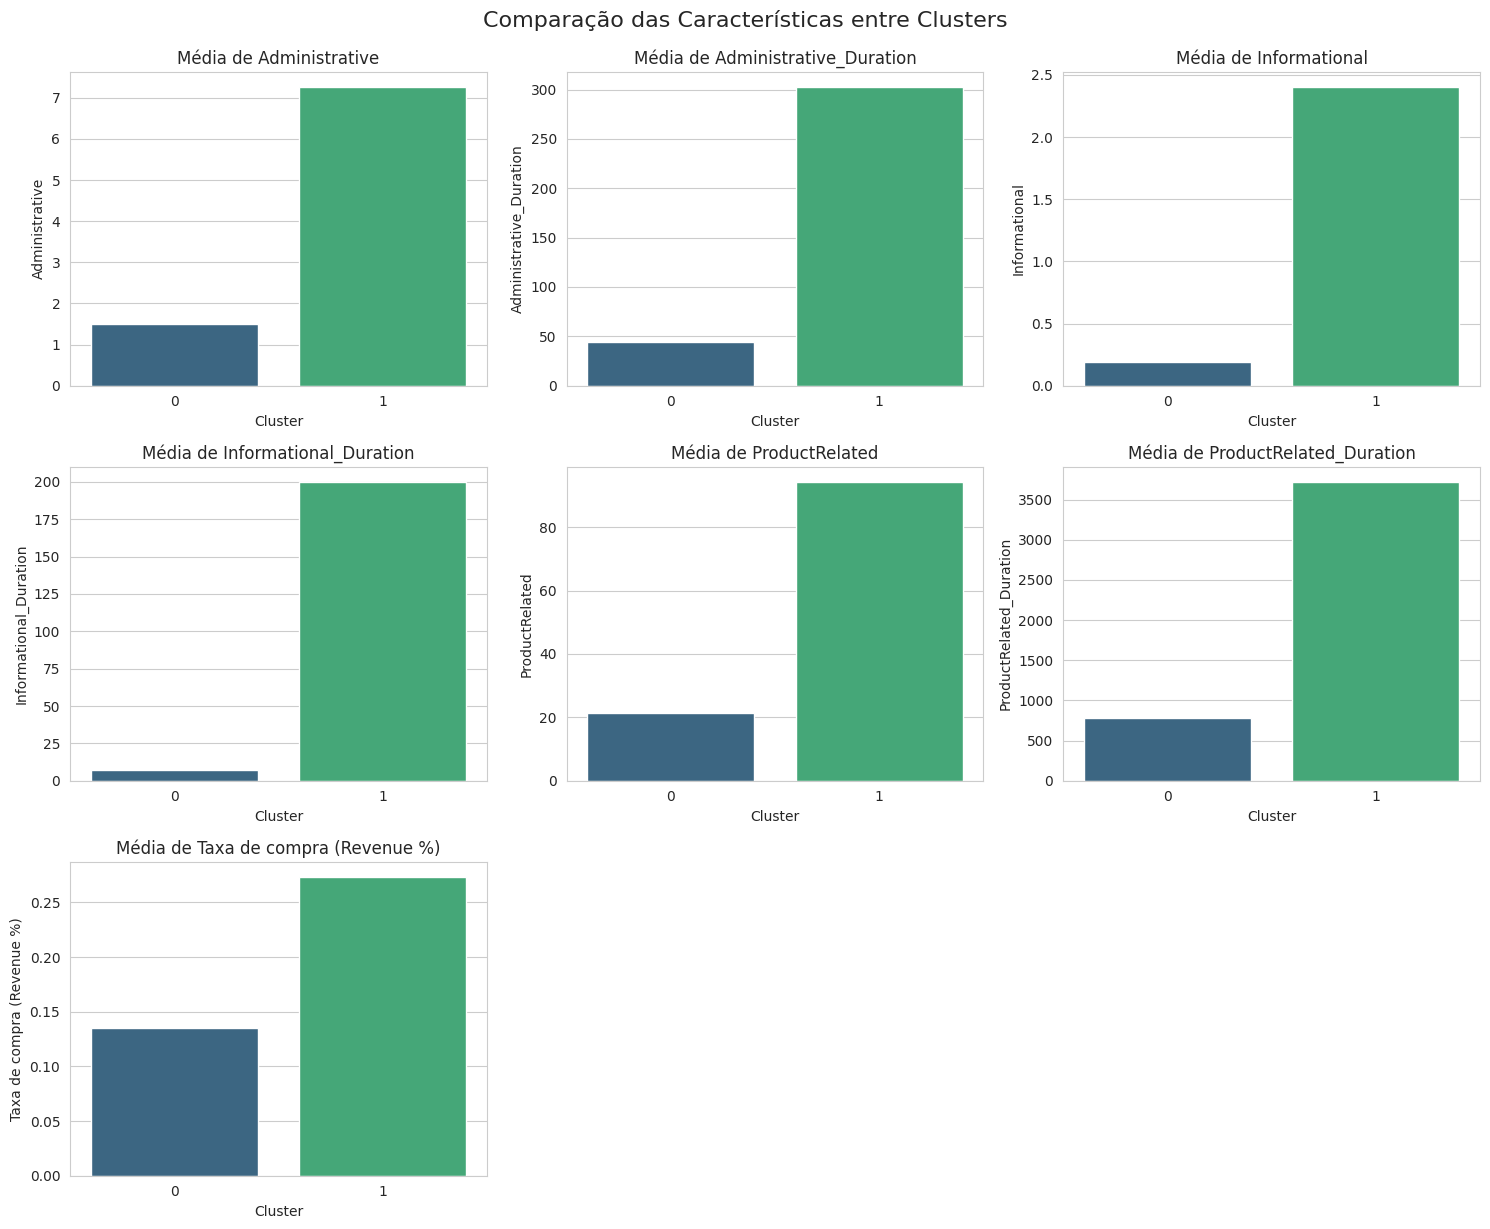

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cluster_profile_with_revenue is already defined and contains the necessary data
# If not, ensure the preceding cells that create it are run

# Set style for the plots
sns.set_style("whitegrid")

# Get the number of features to plot
num_features = len(cluster_profile_with_revenue.columns)

# Determine grid size for subplots
num_cols = 3 # Number of columns for the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols # Calculate rows needed

plt.figure(figsize=(num_cols * 5, num_rows * 4)) # Adjust figure size dynamically

for i, col in enumerate(cluster_profile_with_revenue.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.barplot(x=cluster_profile_with_revenue.index, y=col, data=cluster_profile_with_revenue, palette='viridis')
    plt.title(f'Média de {col}')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.tight_layout()

plt.suptitle('Comparação das Características entre Clusters', y=1.02, fontsize=16)
plt.show()

**Insights**

Comportamento é altamente preditivo de intenção de compra.
O cluster que mais explora páginas de produto apresenta a maior probabilidade de compra.

Usuários de navegação rápida têm baixa conversão, indicando que poderiam ser alvo de ações de retenção (banner, cupom, pop-up de ajuda).

Usuários informacionais não estão descartados, mas podem estar buscando condições, regras, política de devolução ou instruções. Estratégias de persuasão podem aumentar conversões.

A segmentação por comportamento é eficaz, permitindo que empresas personalizem ofertas e melhorem a experiência do usuário conforme o cluster.

**Conclusão**

O uso do K-means sobre as variáveis de navegação permitiu identificar três grupos de usuários com comportamentos distintos. Os resultados confirmam a relação entre modo de navegação e intenção de compra, como descrito no artigo original de Sakar et al. (2018).

Entre os clusters, o grupo mais engajado em páginas de produto demonstrou maior probabilidade de compra, enquanto os clusters de navegação rápida e informacional apresentaram menor propensão.

Essa segmentação fornece uma base sólida para estratégias de marketing, personalização e otimização do funil de vendas em ambientes de e-commerce.